In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plotting_boxplot(df, var, level):
    '''
    this function plots a box plot of all the 4 type tests of the corresponding level and variable
    '''
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    ax = sns.boxplot(  x='type_test', y=var, data=df)
    ax.set_title('{} IN LEVEL {}'.format(var,level))
    plt.show()

In [2]:
# display options
# pd.set_option("display.max_rows", None, "display.max_columns", None) # to print all dataframe
# pd.reset_option("display.max_rows", "display.max_columns") # to reset 

In [3]:
# INPUT PARAMETERS
input_path = './../../../Data/Data_cogito/Processed_data/final_tests_1/'
input_file_ball = 'ball_data.csv'
input_file_pattern = 'pattern_data.csv'

In [4]:
# READ DATA
df_ball = pd.read_csv(input_path+input_file_ball, sep = ';', na_values='None')

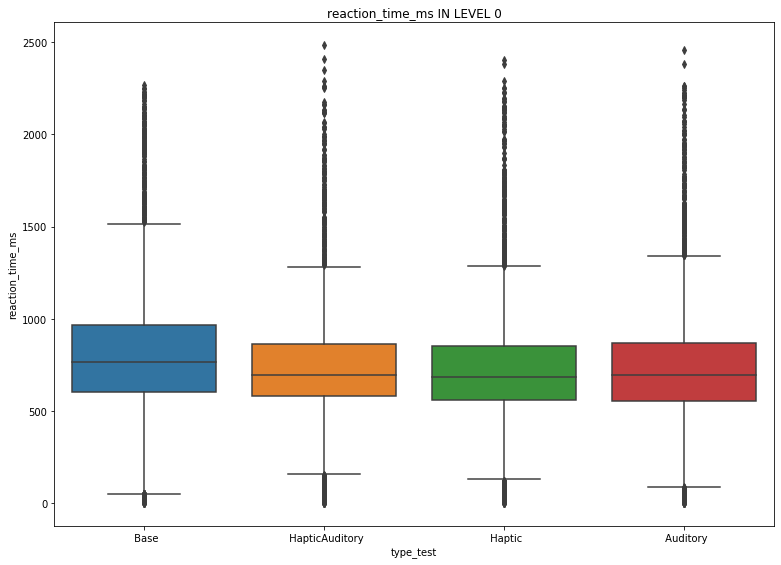

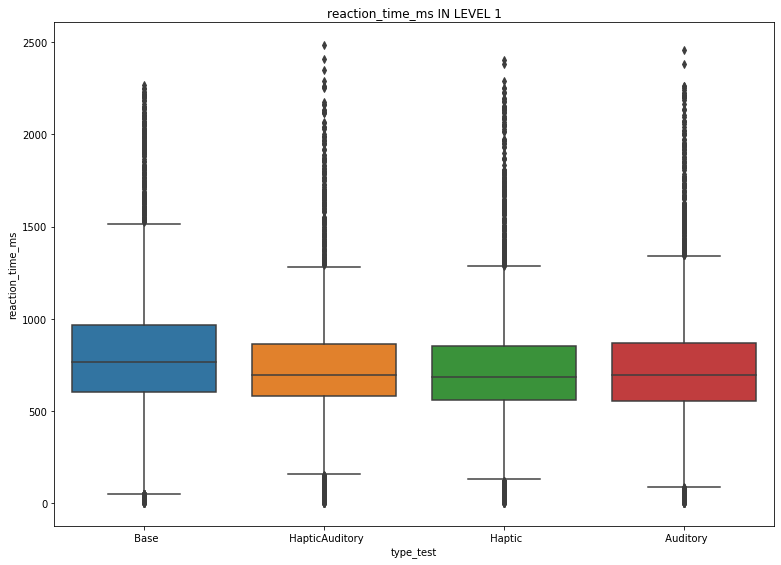

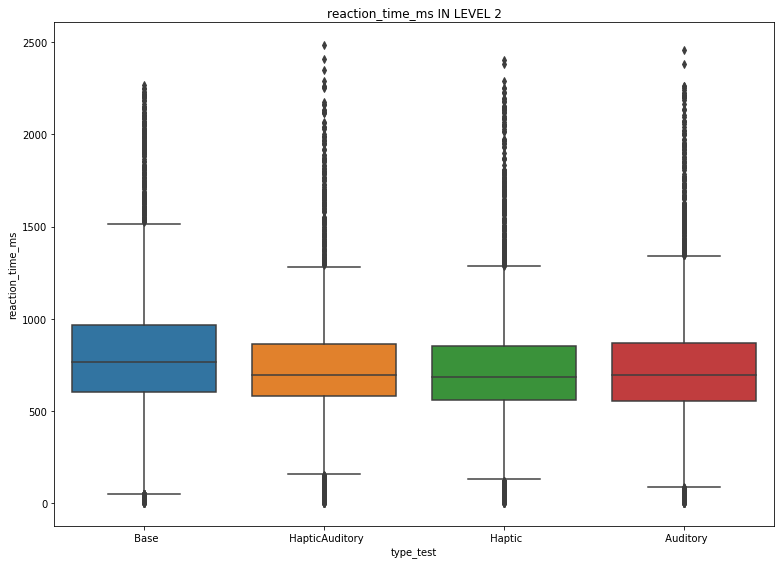

In [5]:
plotting_boxplot(df_ball, var = 'reaction_time_ms', level = 0)
plotting_boxplot(df_ball, var = 'reaction_time_ms', level = 1)
plotting_boxplot(df_ball, var = 'reaction_time_ms', level = 2)

> NAN counter for levels 0 and 1 in variable **time_ms**:

Based on quantity of nan values in variable 'time_ms', some id are going to be removed if they are outliers.
One outlier will be an id which nan values are bigger than average nan quantity + 2*(stdev).

These outliers imply they were not full concentrated as the user's tendency

In [6]:
# nan counter
# levels 0,1 ordered by time_ms
df_nan = df_ball[ df_ball['level'].isin([0,1]) ].drop(['id_user', 'level', 'type_test'], 1).isna().groupby([df_ball.id_user, df_ball.type_test], sort=True).sum().reset_index().sort_values('time_ms', ascending = False)
df_nan

,id_user,type_test,id,system_ball,success,time_ms,reaction_time_ms
27,29,Auditory,0.0,0.0,0.0,65.0,34.0
55,61,HapticAuditory,0.0,0.0,0.0,52.0,2.0
41,47,HapticAuditory,0.0,0.0,0.0,52.0,22.0
47,53,Haptic,0.0,0.0,0.0,51.0,22.0
6,7,HapticAuditory,0.0,0.0,0.0,48.0,12.0
...,...,...,...,...,...,...,...
69,77,Base,0.0,0.0,0.0,8.0,0.0
17,19,HapticAuditory,0.0,0.0,0.0,6.0,0.0
52,58,HapticAuditory,0.0,0.0,0.0,5.0,2.0
71,79,Base,0.0,0.0,0.0,4.0,0.0


In [7]:
print( '{} <-- {} --> {}'.format(
    np.mean(df_nan.time_ms.values) - 2*np.std(df_nan.time_ms.values),
    np.mean(df_nan.time_ms.values),
    np.mean(df_nan.time_ms.values) + 2*np.std(df_nan.time_ms.values)
))

-3.3613506272453755 <-- 22.75 --> 48.86135062724537


Nan threshold for time_ms is:
    -3.36 <-- 22.75 --> 48.86 (upper limit)

Thus, follow ids are going to be removed:
- 29 ::	Auditory 	   :: nan-time_ms(65) ::	nan-reaction_time_ms(34)
- 61 ::	HapticAuditory :: nan-time_ms(52) ::	nan-reaction_time_ms(2)
- 47 ::	HapticAuditory :: nan-time_ms(52) ::	nan-reaction_time_ms(22)
- 53 ::	Haptic 	       :: nan-time_ms(51) ::	nan-reaction_time_ms(22)
    

> NAN counter for levels 0 and 1 in variable **reaction_time_ms**:

Based on quantity of nan values in variable 'reaction_time_ms', some id are going to be removed if they are outliers.
One outlier will be an id which nan values are bigger than average nan quantity + 2*(stdev).

These outliers imply they were not full concentrated as the user's tendency

In [8]:
# nan counter
# levels 0,1 ordered by time_ms
df_nan = df_ball[ df_ball['level'].isin([0,1]) ].drop(['id_user', 'level', 'type_test'], 1).isna().groupby([df_ball.id_user, df_ball.type_test], sort=True).sum().reset_index().sort_values('reaction_time_ms', ascending = False)
df_nan

,id_user,type_test,id,system_ball,success,time_ms,reaction_time_ms
27,29,Auditory,0.0,0.0,0.0,65.0,34.0
41,47,HapticAuditory,0.0,0.0,0.0,52.0,22.0
47,53,Haptic,0.0,0.0,0.0,51.0,22.0
70,78,Haptic,0.0,0.0,0.0,26.0,16.0
45,51,Haptic,0.0,0.0,0.0,40.0,16.0
...,...,...,...,...,...,...,...
33,37,Haptic,0.0,0.0,0.0,10.0,0.0
35,39,Auditory,0.0,0.0,0.0,33.0,0.0
40,46,Haptic,0.0,0.0,0.0,12.0,0.0
43,49,HapticAuditory,0.0,0.0,0.0,13.0,0.0


In [9]:
print( '{} <-- {} --> {}'.format(
    np.mean(df_nan.reaction_time_ms.values) - 2*np.std(df_nan.reaction_time_ms.values),
    np.mean(df_nan.reaction_time_ms.values),
    np.mean(df_nan.reaction_time_ms.values) + 2*np.std(df_nan.reaction_time_ms.values)
))

-8.406153745264316 <-- 3.973684210526316 --> 16.35352216631695


Nan threshold for time_ms is:
    -8.41 <-- 3.97 --> 16.35 (upper limit)

Thus, follow ids are going to be removed:
- 29 ::	Auditory 	   :: nan-time_ms(65) ::	nan-reaction_time_ms(34)
- 47 ::	HapticAuditory :: nan-time_ms(52) ::	nan-reaction_time_ms(22)
- 53 ::	Haptic 	0.0    :: nan-time_ms(51) ::	nan-reaction_time_ms(22)
    

> pattern success
Analyzing **scores for success in pattern recall (score_pattern)**. We determined that follow ids are outliers (+/-2*stdev)
- in level 0: 
  - 8	 Auditory
  - 29	 Auditory
- in level 1:
  - 11	 Base
  - 70	 Haptic
  
 > ball success
Analyzing **scores for ball (score_ball)**. We determined that follow ids are outliers (+/-2*stdev)
- in level 0: 
  - 10	 Base
  - 29	 Auditory
  - 53	 Haptic
- in level 1:
  - 29	 Auditory
  
Thus, [8, 29, 11, 70, 10, 53]

Furthermore, the two worst users from Base are removed in order to make all the tests with a similar behaviour  in the variable time_ms

- 60 Base
- 67 Base

Removing the outlier users based on age mean+2*stdev are:
- 19 HapticAuditory
- 54 Base
- 60 Base
- 68 Base

In [221]:
# ids2remove = # [29,47,53,61] # [8, 29, 11, 70, 10, 53]
# ids2remove = [8, 29, 11, 70, 10, 47, 53, 61, 60, 67] # worst balls , worst patterns, age
ids2remove = [8, 29, 11, 70, 10, 47, 53, 61, 60, 67, 19, 54, 68] # worst balls , worst patterns, age
# ids2remove = [8, 29, 11, 70, 10, 47, 53, 61, 60, 9]
# ids2remove = [60,67] 
# ids2remove = [29, 19, 54, 60, 68] # only age
ids2remove = [8, 29, 11, 70, 10, 47, 53, 61, 60, 67, 19, 54, 68, 81] # worst balls , worst patterns, age, time_ms by user
ids2remove = df_ball[ df_ball['id_user'].isin( ids2remove ) ].index
df_ball2 = df_ball.drop(ids2remove , inplace=False)

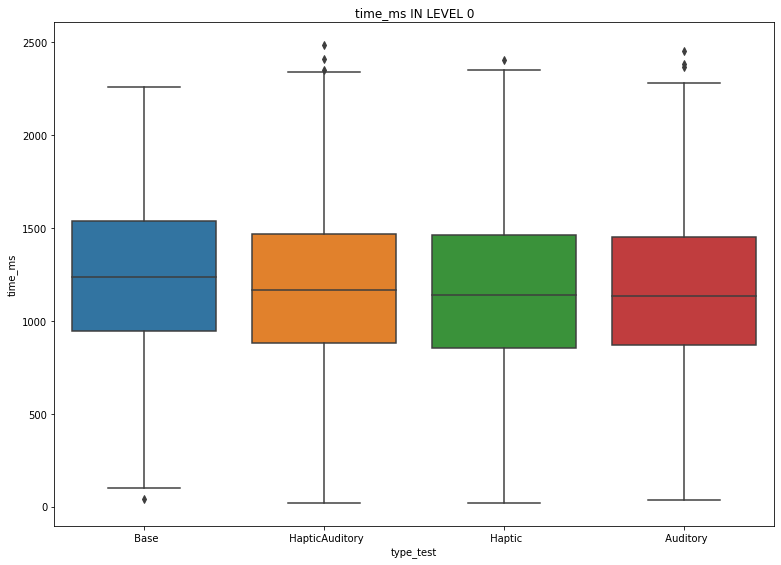

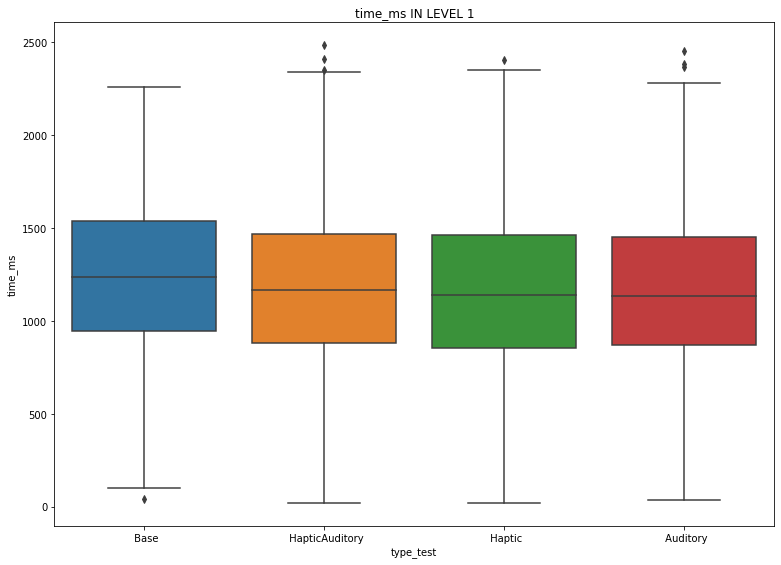

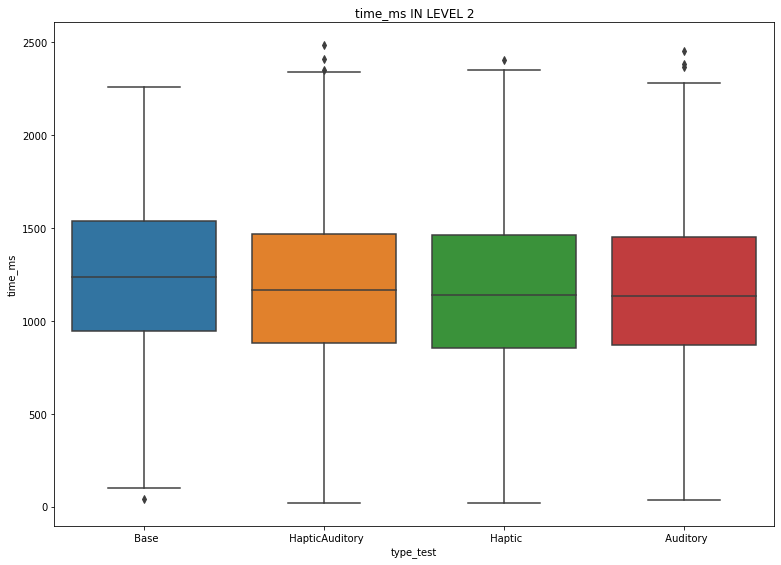

In [55]:
var = 'time_ms'
plotting_boxplot(df_ball, var = var, level = 0)
plotting_boxplot(df_ball, var = var, level = 1)
plotting_boxplot(df_ball, var = var, level = 2)

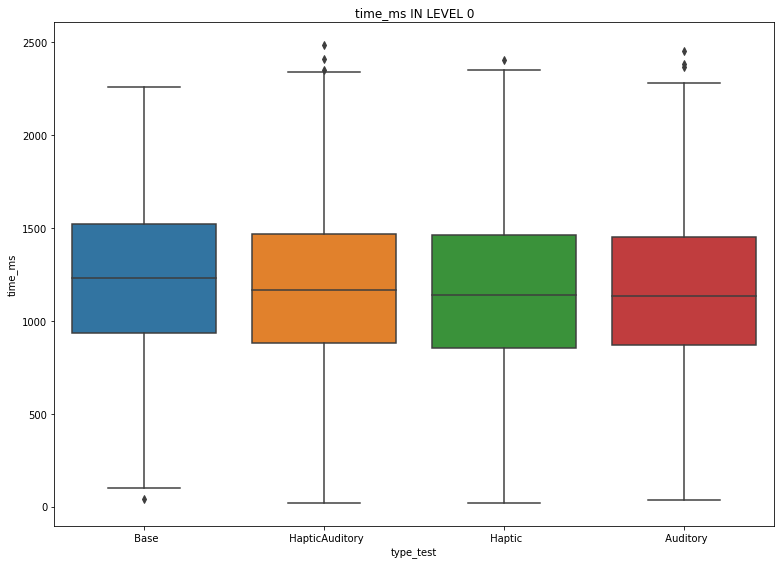

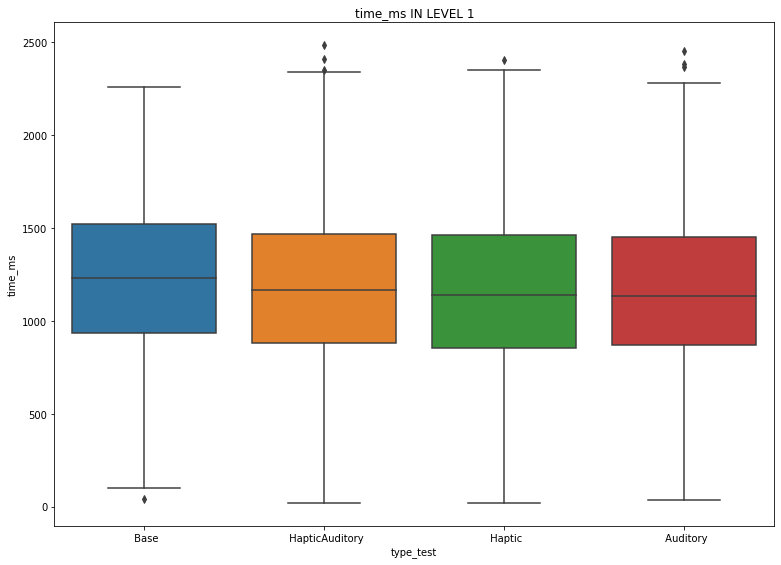

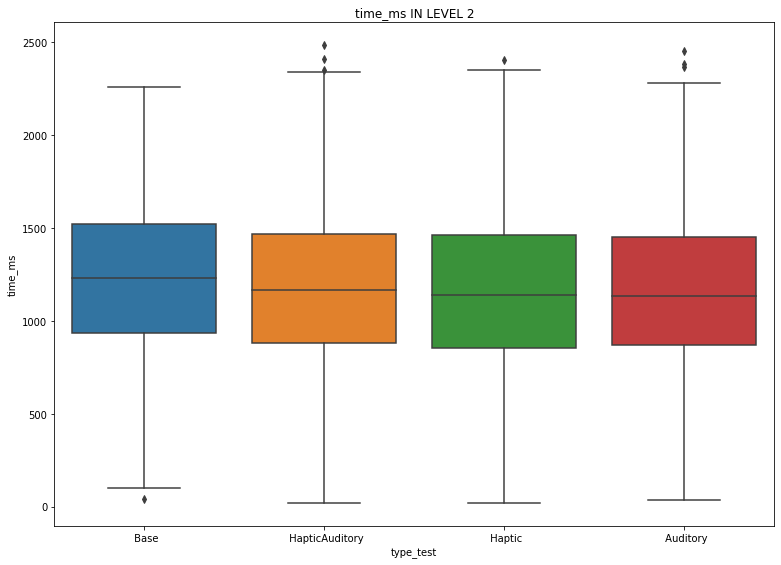

In [56]:
var = 'time_ms'
plotting_boxplot(df_ball2, var = var, level = 0)
plotting_boxplot(df_ball2, var = var, level = 1)
plotting_boxplot(df_ball2, var = var, level = 2)

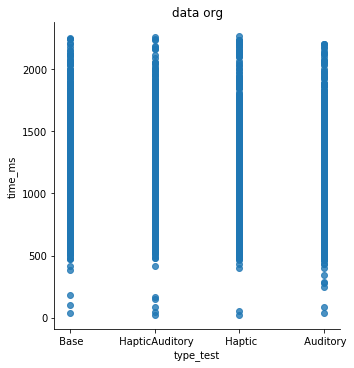

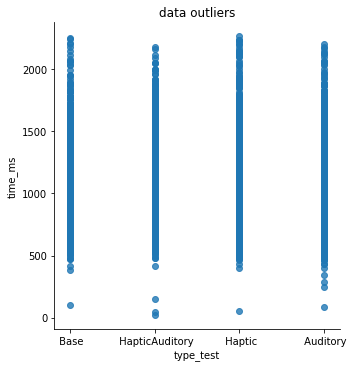

In [188]:
# level0, time_ms,  all type_tests

import seaborn as sns  # for sample data
import matplotlib.pyplot as plt


level = 0
var = 'time_ms'


tests = [' Base', ' Haptic', ' Auditory', ' HapticAuditory']
df = df_ball[( df_ball['level'] ==level)  & (df_ball['type_test'].isin(tests) )]
sns.lmplot(x='type_test', y=var, data=df, fit_reg=False)
plt.title('data org')

tests = [' Base', ' Haptic', ' Auditory', ' HapticAuditory']
df = df_ball2[( df_ball2['level'] ==level)  & (df_ball2['type_test'].isin(tests) )]
sns.lmplot(x='type_test', y=var, data=df, fit_reg=False)
plt.title('data outliers')
plt.show()

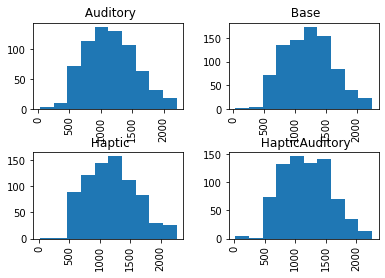

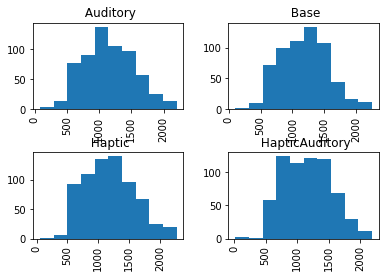

In [196]:
# watching histograms

level = 0
var = 'time_ms'


tests = [' Base', ' Haptic', ' Auditory', ' HapticAuditory']
df = df_ball[( df_ball['level'] ==level)  & (df_ball['type_test'].isin(tests) )]
df[var].hist(by=df['type_test'])
plt.show()


tests = [' Base', ' Haptic', ' Auditory', ' HapticAuditory']
df = df_ball2[( df_ball2['level'] ==level)  & (df_ball2['type_test'].isin(tests) )]
df[var].hist(by=df['type_test'])
plt.show()


Text(0.5, 1, 'data org. Grorup BASE')

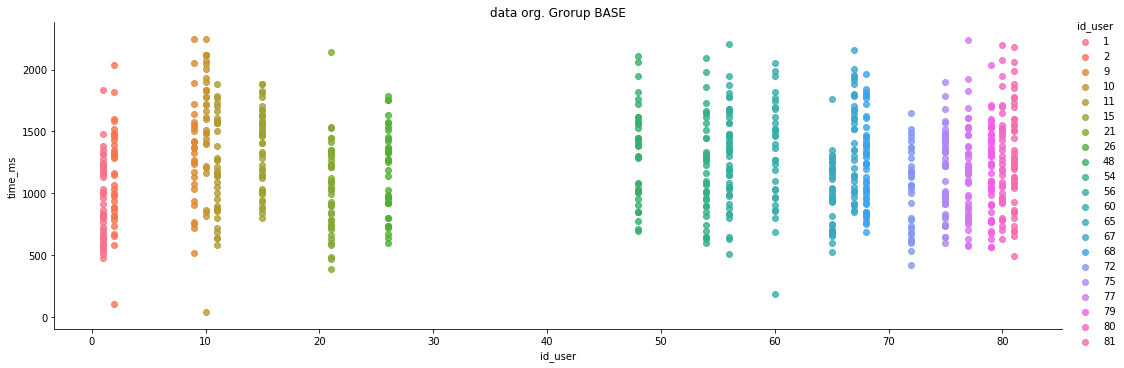

In [208]:
level = 0
var = 'time_ms'

tests = [' Base']
df = df_ball[( df_ball['level'] ==level)  & (df_ball['type_test'].isin(tests) )]
sns.lmplot(x='id_user', y=var, data=df, fit_reg=False, hue = 'id_user', legend_out = True, height=5, aspect=3)
plt.title('data org. Group BASE')

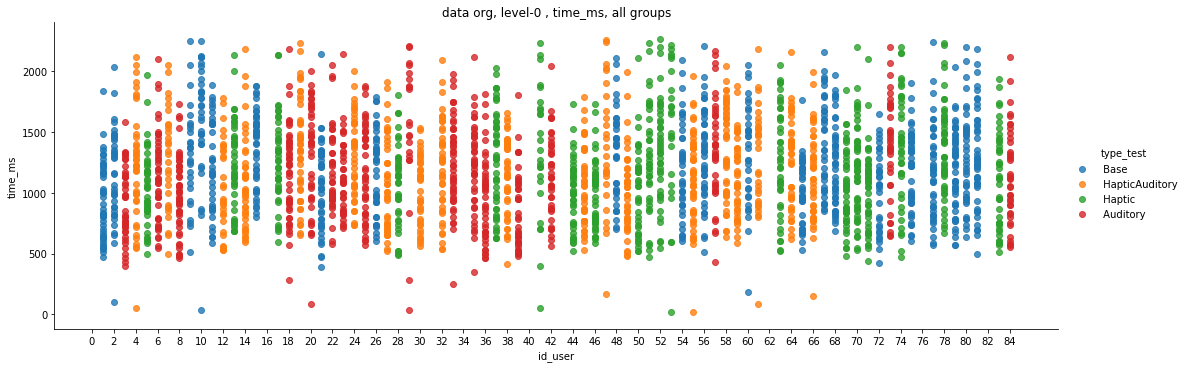

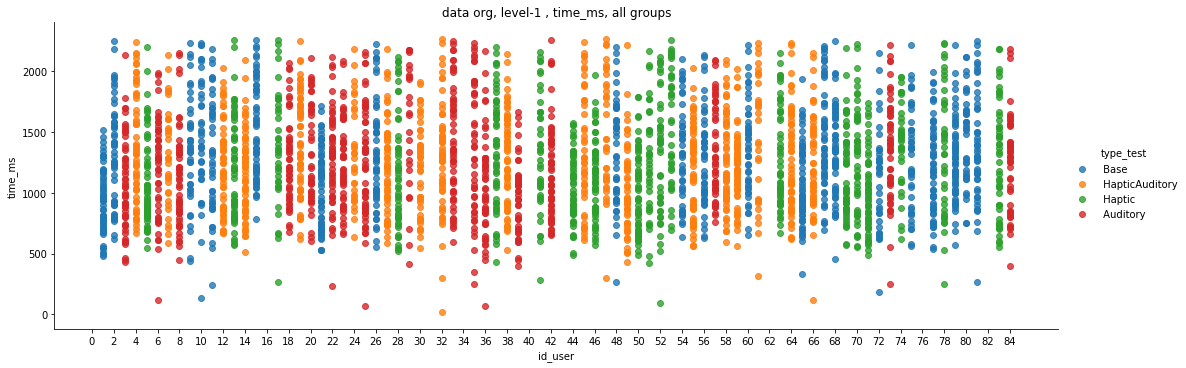

In [219]:
level = 0
var = 'time_ms'

tests = [' Base', ' Haptic', ' Auditory', ' HapticAuditory']
df = df_ball[( df_ball['level'] ==level)  & (df_ball['type_test'].isin(tests) )]
sns.lmplot(x='id_user', y=var, data=df, fit_reg=False, hue = 'type_test', legend_out = True, height=5, aspect=3)
plt.xticks( np.arange(0,86,2) )
plt.title('data org, level-{} , {}, all groups'.format(level,var))


level = 1

tests = [' Base', ' Haptic', ' Auditory', ' HapticAuditory']
df = df_ball[( df_ball['level'] ==level)  & (df_ball['type_test'].isin(tests) )]
sns.lmplot(x='id_user', y=var, data=df, fit_reg=False, hue = 'type_test', legend_out = True, height=5, aspect=3)
plt.xticks( np.arange(0,86,2) )
plt.title('data org, level-{} , {}, all groups'.format(level,var))

plt.show()

In [ ]:
ids2remove = [19,54,60,68] # age outliers
ids2remove = [10,29,53] # score_ball (not perfect score) outliers. level 0
ids2remove = [29] # score_ball (not perfect score) outliers. level 1
ids2remove = [8, 29] # score_pattern (not perfect score) outliers. level 0
ids2remove = [11,70] # score_pattern (not perfect score) outliers. level 1
ids2remove = [60,67] # 2 worst base users

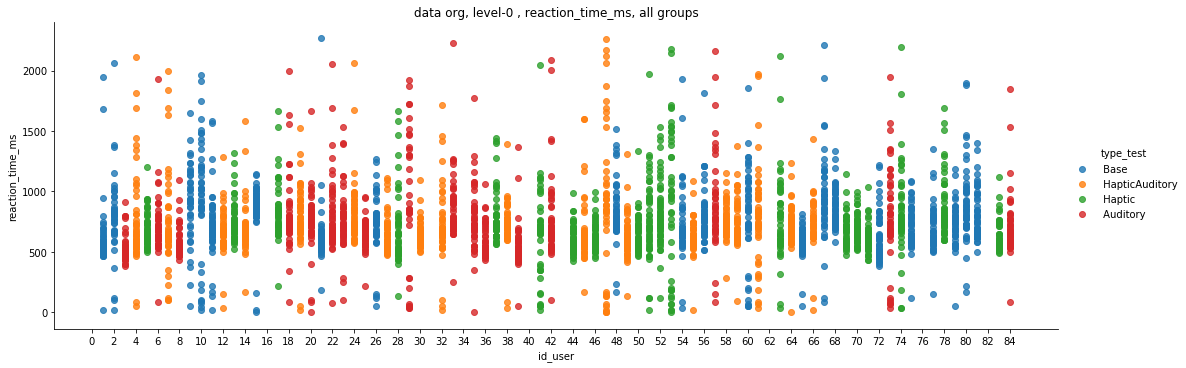

In [220]:
level = 0
var = 'reaction_time_ms'

tests = [' Base', ' Haptic', ' Auditory', ' HapticAuditory']
df = df_ball[( df_ball['level'] ==level)  & (df_ball['type_test'].isin(tests) )]
sns.lmplot(x='id_user', y=var, data=df, fit_reg=False, hue = 'type_test', legend_out = True, height=5, aspect=3)
plt.title('data org, level-{} , {}, all groups'.format(level,var))
plt.xticks( np.arange(0,86,2) )
plt.show()

# ( ) TERMINAR DE VER QUÉ PASA CON BASE Y SIN BASE
# EN DF FULL Y DF FILTRADO

In [249]:
from bioinfokit.analys import stat
# Null hypothesis: Groups means are equal (no variation in means of groups)
# Alternative hypothesis: At least, one group mean is different from other groups 

def anova_test():
    '''
    it uses global variables:
    - df_ball: as original data
    - df_ball2: as data without outliers
    - level: 0, 1 or 2
    - var: specifying the variable to analyze
    '''
    
    ## ALL GROUPS IN ORIGINAL DATA
#     tests = [' Base', ' Haptic', ' Auditory', ' HapticAuditory'] # [' Base', 'Haptic', ' Auditory', 'HapticAuditory']
#     print('- data org')
#     res = stat()
#     df = df_ball[( df_ball['level'] ==level)  & (df_ball['type_test'].isin(tests) )]
#     res.anova_stat(df = df, res_var=var, anova_model='{} ~ type_test'.format(var))
#     print(len(df))
#     print(res.anova_summary)

    # ORIGINAL DATA WITHOUT BAS
#     tests = [' Bas', ' Haptic', ' Auditory', ' HapticAuditory'] # [' Base', 'Haptic', ' Auditory', 'HapticAuditory']
#     print('\n- data org no base')
#     res = stat()
#     df = df_ball[( df_ball['level'] ==level) & (df_ball['type_test'].isin(tests) )]
#     res.anova_stat(df = df, res_var=var, anova_model='{} ~ type_test'.format(var))
#     print(len(df))
#     print(res.anova_summary)


    # DATA WITHOUT OUTLIERS
    tests = [' Base', ' Haptic', ' Auditory', ' HapticAuditory'] # [' Base', 'Haptic', ' Auditory', 'HapticAuditory']
    print('\n- data outliers')
    res = stat()
    df = df_ball2[( df_ball2['level']==level) & (df_ball2['type_test'].isin(tests) )]
    res.anova_stat(df = df, res_var=var, anova_model='{} ~ type_test'.format(var))
    print(len(df))
    print(res.anova_summary)

In [ ]:
# ids2remove = # [29,47,53,61] # [8, 29, 11, 70, 10, 53]
# ids2remove = [8, 29, 11, 70, 10, 47, 53, 61, 60, 67] # worst balls , worst patterns, age
ids2remove = [8, 29, 11, 70, 10, 47, 53, 61, 60, 67, 19, 54, 68] # worst balls , worst patterns, age
# ids2remove = [8, 29, 11, 70, 10, 47, 53, 61, 60, 9]
# ids2remove = [60,67] 
# ids2remove = [29, 19, 54, 60, 68] # only age
ids2remove = [8, 29, 11, 70, 10, 47, 53, 61, 60, 67, 19, 54, 68, 81] # worst balls , worst patterns, age, time_ms by user
ids2remove = df_ball[ df_ball['id_user'].isin( ids2remove ) ].index
df_ball2 = df_ball.drop(ids2remove , inplace=False)

In [255]:
level = 0
var = 'time_ms'

print(' \n>> age outliers ')
ids2remove = [19,54,60,68] # age outliers
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

print(' \n>> score_ball (not perfect score) outliers. level 0 ')
ids2remove = [10,29,53] # score_ball (not perfect score) outliers. level 0
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

print(' \n>> score_ball (not perfect score) outliers. level 1 ')
ids2remove = [29] # score_ball (not perfect score) outliers. level 1
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

print(' \n>> score_pattern (not perfect score) outliers. level 0 ')
ids2remove = [8, 29] # score_pattern (not perfect score) outliers. level 0
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

print(' \n>> score_pattern (not perfect score) outliers. level 1 ')
ids2remove = [11,70] # score_pattern (not perfect score) outliers. level 1
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

print(' \n>> 2 worst users in level 0 of Base ')
ids2remove = [60,67] # 2 worst users in level 0 of Base
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

 
>> age outliers 

- data outliers
3456
               df        sum_sq        mean_sq         F    PR(>F)
type_test     3.0  1.581599e+06  527199.651865  3.342838  0.018458
Residual   2869.0  4.524705e+08  157710.192158       NaN       NaN
 
>> score_ball (not perfect score) outliers. level 0 

- data outliers
3504
               df        sum_sq        mean_sq       F    PR(>F)
type_test     3.0  1.467229e+06  489076.416106  3.2266  0.021633
Residual   2952.0  4.474535e+08  151576.394904     NaN       NaN
 
>> score_ball (not perfect score) outliers. level 1 

- data outliers
3600
               df        sum_sq        mean_sq         F    PR(>F)
type_test     3.0  2.385980e+06  795326.560690  5.098234  0.001609
Residual   3009.0  4.694052e+08  156000.393226       NaN       NaN
 
>> score_pattern (not perfect score) outliers. level 0 

- data outliers
3552
               df        sum_sq        mean_sq         F    PR(>F)
type_test     3.0  1.762915e+06  587638.357668  3.753455  0.0

In [259]:
# selecting the 2 biggest p-values: (score ball level 0) and (2 worst base users)
print(' >> selecting the 2 biggest p-values: (score ball level 0) and (2 worst base users')

ids2remove = [10,29,53, 60, 67]
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

print(' \n>> adding only age')
ids2remove = [10,29,53, 60, 67, 19, 54, 68]
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()


print(' \n>> adding only score pattern level 0')
ids2remove = [10,29,53, 60, 67, 8]
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

 >> selecting the 2 biggest p-values: (score ball level 0) and (2 worst base users

- data outliers
3408
               df        sum_sq        mean_sq         F    PR(>F)
type_test     3.0  8.836489e+05  294549.646755  1.955043  0.118614
Residual   2882.0  4.342063e+08  150661.466475       NaN       NaN
 
>> adding only age

- data outliers
3264
               df        sum_sq        mean_sq         F    PR(>F)
type_test     3.0  7.137239e+05  237907.979566  1.583673  0.191225
Residual   2753.0  4.135707e+08  150225.473801       NaN       NaN
 
>> adding only score pattern

- data outliers
3360
               df        sum_sq        mean_sq         F    PR(>F)
type_test     3.0  4.663192e+05  155439.719402  1.028333  0.378875
Residual   2835.0  4.285299e+08  151156.937274       NaN       NaN


In [278]:
ids2remove = [19,54,60,68] # age outliers
ids2remove = [10,29,53] # score_ball (not perfect score) outliers. level 0
ids2remove = [29] # score_ball (not perfect score) outliers. level 1
ids2remove = [8, 29] # score_pattern (not perfect score) outliers. level 0
ids2remove = [11,70] # score_pattern (not perfect score) outliers. level 1
ids2remove = [60,67] # 2 worst users in level 0 of Base

level = 0
var = 'time_ms'

ids2remove = [19,54,60,68,  10,29,53,  29,  8,29,  11,70,  60,67]
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

ids2remove = [  10,29,53,  29,  8,29,  11,70,  67]
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

ids2remove = [19,54,60,68,  8,  11,70,  60,67]
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

ids2remove = [19,54,60,68,  10,53,   8,  11,70,  60,67]
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

ids2remove = [19,54,60,68,  10,53,  11,70,  60,67]
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

ids2remove = [19,54,60,68,  10,29,53,  29,  8,29,   60,67]
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()

ids2remove = [19,54,68,  10,29,53,  29,  8,29,  11,70 ]
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()


- data outliers
3120
               df        sum_sq        mean_sq         F    PR(>F)
type_test     3.0  3.141295e+05  104709.844149  0.693374  0.556032
Residual   2621.0  3.958104e+08  151015.028828       NaN       NaN

- data outliers
3312
               df        sum_sq        mean_sq         F    PR(>F)
type_test     3.0  5.678853e+05  189295.096955  1.245895  0.291437
Residual   2782.0  4.226831e+08  151934.978159       NaN       NaN

- data outliers
3264
               df        sum_sq        mean_sq         F    PR(>F)
type_test     3.0  6.896124e+05  229870.788942  1.450546  0.226167
Residual   2699.0  4.277157e+08  158471.923691       NaN       NaN

- data outliers
3168
               df        sum_sq        mean_sq         F    PR(>F)
type_test     3.0  1.352133e+05   45071.105584  0.293866  0.829861
Residual   2642.0  4.052114e+08  153372.964593       NaN       NaN

- data outliers
3216
               df        sum_sq        mean_sq        F    PR(>F)
type_test     3.0  3

- - - - - - - 
**After all the different analysis, I decided to remove below ids:**

--> **[19,54,60,68,  10,53,   8,  11,70,  60,67]**


orderly they are [ 8 , 10,  11,  19,  53,  54,  60,  67,  68,  70]

In [279]:
level = 0
var = 'time_ms'
ids2remove = [19,54,60,68,  10,53,   8,  11,70,  60,67]
df_ball2 = df_ball.drop( df_ball[ df_ball['id_user'].isin( ids2remove ) ].index , inplace=False)
anova_test()


- data outliers
3168
               df        sum_sq        mean_sq         F    PR(>F)
type_test     3.0  1.352133e+05   45071.105584  0.293866  0.829861
Residual   2642.0  4.052114e+08  153372.964593       NaN       NaN


In [281]:
print('- data org')
print(df_ball[ df_ball['level']==0 ].groupby('type_test')['id_user'].nunique())

print('\n- data outliers')
print(df_ball2[ df_ball2['level']==0 ].groupby('type_test')['id_user'].nunique())

- data org
type_test
 Auditory          17
 Base              21
 Haptic            19
 HapticAuditory    19
Name: id_user, dtype: int64

- data outliers
type_test
 Auditory          16
 Base              15
 Haptic            17
 HapticAuditory    18
Name: id_user, dtype: int64
